In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [17]:
from sklearn.cluster import KMeans
import pandas as pd

# Create a list with the number of k-values to try
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters parameter
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


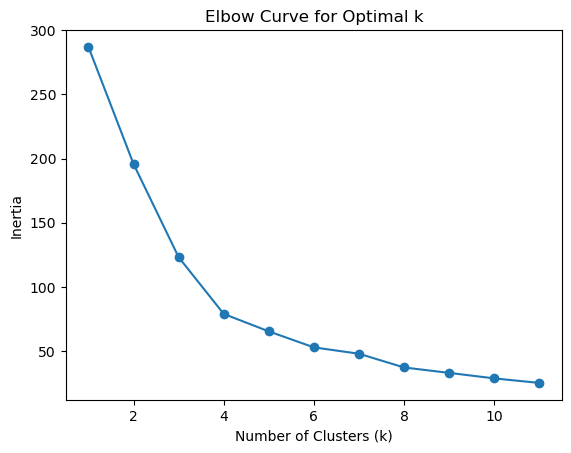

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for 
𝑘 is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [21]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10)



In [23]:
# Fit the K-Means model using the scaled data
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


KMeans(n_clusters=4, n_init=10, random_state=1)

In [25]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_df)


# View the resulting array of cluster values.
cluster_labels


array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [35]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()



In [37]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = cluster_labels


# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: title={'center': 'Scatter Plot of Cryptocurrencies by Cluster'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

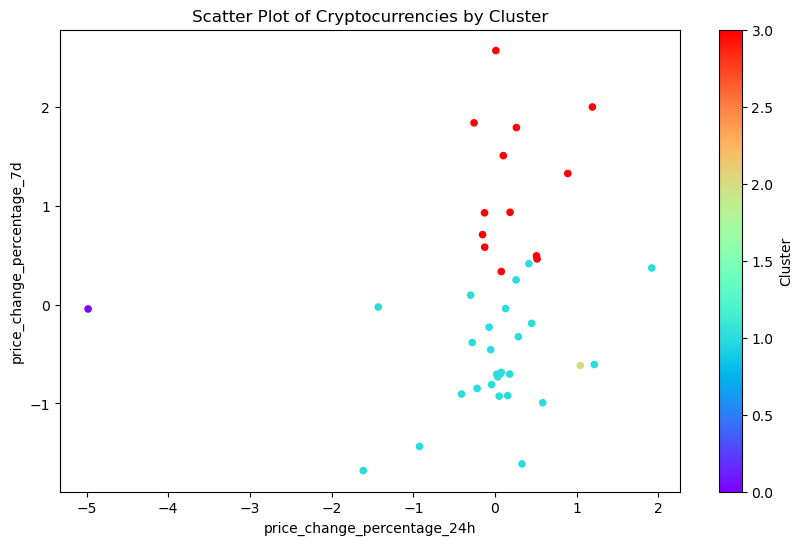

In [47]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Create a scatter plot using Pandas
clustered_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",  # Use the Cluster column for color coding
    colormap="rainbow",  # Set the color map to "rainbow"
    figsize=(10, 6),  # Optional: Adjust the size of the plot
    title="Scatter Plot of Cryptocurrencies by Cluster"
)

### Optimize Clusters with Principal Component Analysis.

In [49]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)



In [53]:
# Apply PCA with fit_transform on the original scaled DataFrame
pca_data = pca.fit_transform(scaled_df)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(
    data=pca_data, 
    columns=['PC1', 'PC2', 'PC3'],  # Naming the components
    index=scaled_df.index  # Retaining the original index
)

# View the first five rows of the resulting DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [57]:
# Retrieve the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.54% (0.3719856 + 0.34700813 + 0.17603793 = 0.89503166, which is approximately 89.54%).

In [59]:
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_data,  # Use the PCA-transformed data
    columns=['PC1', 'PC2', 'PC3'],  # Naming the principal components
    index=scaled_df.index  # Retaining the original index (coin_id)
)

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [61]:
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Step 2: Create an empty list to store the inertia values
inertia = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    
    # 2. Fit the model to the data using the PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Step 6: Display the DataFrame
elbow_df


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.134056
7,8,17.437664
8,9,13.742792
9,10,10.484890


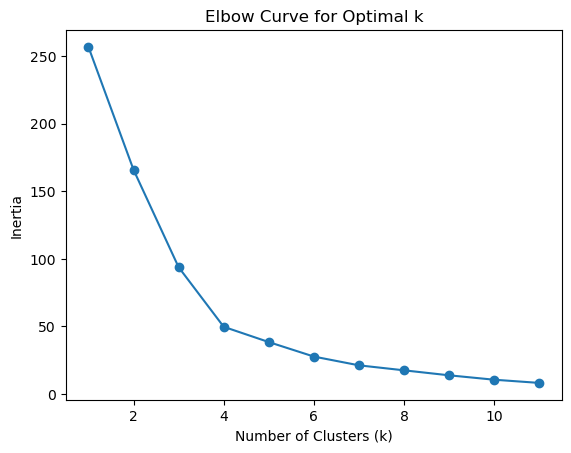

In [63]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  * Based on the Elbow Curve generated using the PCA data, the best value for 
𝑘 appears to be 3. This is the point where the inertia significantly decreases and starts to flatten out, indicating that additional clusters beyond 
𝑘=3 result in diminishing returns in terms of reducing inertia.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  *  Yes, it does differ. The best 
𝑘 value found using the original data was 4. The PCA-transformed data suggests that 
𝑘=3 is optimal, indicating that the dimensionality reduction performed by PCA might have influenced the clustering structure, leading to a slightly different optimal number of clusters.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [65]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k (3)
kmeans_pca = KMeans(n_clusters=3, random_state=1, n_init=10)


In [67]:
# Fit the K-Means model using the PCA data
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


KMeans(n_clusters=3, n_init=10, random_state=1)

In [69]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_labels = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
pca_cluster_labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int32)

In [71]:
# Create a copy of the DataFrame with the PCA data
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = pca_cluster_labels

# Display sample data
pca_clustered_df.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [73]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
# Create a scatter plot using hvPlot
scatter_plot = pca_clustered_df.hvplot.scatter(
    x='PC1',  # x-axis is the first principal component
    y='PC2',  # y-axis is the second principal component
    c='Cluster',  # Color by cluster
    cmap='Category10',  # Use a categorical colormap
    hover_cols=['PC3'],  # Optional: Add PC3 as hover information
    title='Scatter Plot of Cryptocurrencies by PCA Components'
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster,PC3)

### Determine the Weights of Each Feature on each Principal Component

In [103]:
# Check the structure of the scaled DataFrame
print(scaled_df.head())


                             price_change_percentage_7d  \
price_change_percentage_24h                               
 0.508529                                      0.493193   
 0.185446                                      0.934445   
 0.021774                                     -0.706337   
-0.040764                                     -0.810928   
 1.193036                                      2.000959   

                             price_change_percentage_14d  \
price_change_percentage_24h                                
 0.508529                                       0.772200   
 0.185446                                       0.558692   
 0.021774                                      -0.021680   
-0.040764                                       0.249458   
 1.193036                                       1.760610   

                             price_change_percentage_30d  \
price_change_percentage_24h                                
 0.508529                                    

In [105]:
# Use the columns from the original scaled DataFrame as the index.
# Set the specific columns as the index
scaled_df.set_index(['price_change_percentage_24h', 
                     'price_change_percentage_7d', 
                     'price_change_percentage_14d', 
                     'price_change_percentage_30d', 
                     'price_change_percentage_60d', 
                     'price_change_percentage_200d', 
                     'price_change_percentage_1y'], inplace=True)

# Display the DataFrame to verify
print(scaled_df.head())




KeyError: "None of ['price_change_percentage_24h'] are in the columns"

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    